<a href="https://colab.research.google.com/github/DavidENicolasC/Computer-Engineering-IPN/blob/Teoria-Automatas/Python/Google-Colab/CrossSellingFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import networkx as net
import graphviz
import matplotlib.pyplot as plt
import csv

In [132]:
#Crea una lista vacia que contendra el grafo dirigido (ponderado) para cada codigo de producto
G = []

In [133]:
#n indica el numero de nodos que se van a generar para hacer mas legible el grafo a la hora de la impresion
n = 384

In [134]:
#Recibe los codigos de los productos que se han comprado
var = "".join( input('¿Cuáles son los codigos de los productos que compro el usuario? ') )
C = var.split(sep=' ')

¿Cuáles son los codigos de los productos que compro el usuario? 1885 2335 2352 2584


In [135]:
#Abre el archivo
with open('CrossActividad.csv', newline='') as archivo:
    datos = csv.reader(archivo, delimiter=',', quotechar='|')
    #i recibe los datos de la primera fila, esto es, los codigos
    i = next(datos)
    for v in range(len(C)):

      #Crea un nuevo grafo y lo agrega a la lista de grafos
      g = net.DiGraph()
      G.append(g)      
    
      #j recibe los datos de la fila con el codigo indicado para obtener las probabilidades
      j = next(datos)
      while j[0] != C[v]:
        j = next(datos)

      #crea los nodos y los enlaces del grafo en curso asignando como pesos las probabilidades
      for k in range(1, n):
        if j[k] != '0%':
            G[v].add_edge(C[v], i[k], weight=int(j[k][:-1]))

In [136]:
#Arma un diccionario con las probabilidades y decide cual recomendar

#El siguiente diccionario contiene:
#Como llave, el codigo del producto
#Como valor, una lista con:
#     La suma total de las probabilidades del producto en cada grafo
#     El numero de veces que el producto aparece en cada grafo

L = {}

for k in range(len(C)):
  g = G[k]
  for c in g.neighbors(C[k]):
    #Obtiene el peso de la arista actual
    peso=int(g[C[k]][c].get('weight'))
    if c in L:
      a, b = L[c]
      L[c] = [a+peso, b+1]
    else:
      L[c] = [peso, 1]

y = []
probmedia = 0
for x, y in L.items():
  if (y[0]//y[1] > probmedia and x not in C):
    probmedia=y[0]//y[1]
    producto=x
    num=y[1]

print("Los productos comprados fueron:", end=' ')
for f in C:
  print(f, end=' ')

print('\n')
print(f"El producto a recomendar es: {producto} con una probabilidad media de {probmedia}% en {num} de los {len(C)} grafos")

Los productos comprados fueron: 1885 2335 2352 2584 

El producto a recomendar es: 673 con una probabilidad media de 66% en 4 de los 4 grafos


**Dibujo de los grafos generados para demostrar que existen**

{('1885', '353'): Text(-0.4632227073224305, -0.06542802083996116, '9'),
 ('1885', '354'): Text(0.44026585405907387, -0.2838926482230153, '5'),
 ('1885', '360'): Text(0.2257564942884014, -0.45231198330032724, '26'),
 ('1885', '382'): Text(0.08514621394585734, 0.41096992924540043, '10'),
 ('1885', '386'): Text(-0.06027240201664266, -0.50816422231457, '14'),
 ('1885', '389'): Text(-0.36164769688195764, 0.26955441702509264, '8'),
 ('1885', '393'): Text(0.4897418432356235, 0.029983108559798785, '13'),
 ('1885', '396'): Text(-0.21977665497368581, -0.45446079481982343, '3'),
 ('1885', '401'): Text(-0.22465556508909595, 0.3566860101449281, '4'),
 ('1885', '405'): Text(-0.4173343169319338, 0.10209495239942515, '10'),
 ('1885', '422'): Text(-0.07331698693875979, 0.3951337126085518, '1'),
 ('1885', '445'): Text(-0.43335770791801037, -0.24459806955497745, '25'),
 ('1885', '446'): Text(0.3728300585202446, 0.34017906569515494, '2'),
 ('1885', '450'): Text(0.22747195288228594, 0.34812049503914433, '3

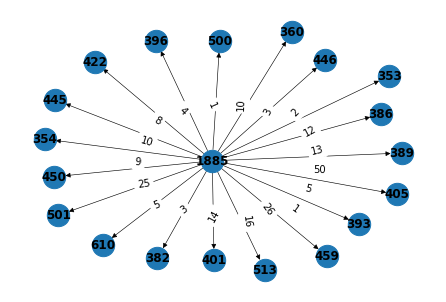

In [117]:
#dibuja el grafo 1
pos=net.spring_layout(G[0])
net.draw(G[0],node_size=500, width=0.6,with_labels=True,font_weight='bold')
labels=net.get_edge_attributes(G[0],'weight')
net.draw_networkx_edge_labels(G[0],pos,edge_labels=labels)

{('2335', '353'): Text(-0.33644383564275554, 0.33553287275476207, '12'),
 ('2335', '354'): Text(-0.020123352909657936, 0.47495051033843383, '6'),
 ('2335', '360'): Text(0.31214023349269215, -0.45825060983355775, '21'),
 ('2335', '382'): Text(0.15306698918253245, -0.4716276874085488, '14'),
 ('2335', '386'): Text(-0.44215626637070155, 0.18163948803905489, '21'),
 ('2335', '389'): Text(-0.01712130760120513, -0.5156059657719535, '8'),
 ('2335', '393'): Text(-0.4119937152428674, 0.04849116527016208, '14'),
 ('2335', '396'): Text(-0.13671798104109228, -0.4175537539005806, '5'),
 ('2335', '401'): Text(-0.18635528960196707, 0.425997446184305, '5'),
 ('2335', '405'): Text(-0.37880539164368415, -0.26751759550499654, '12'),
 ('2335', '422'): Text(0.5074507693978267, -0.016030925329887626, '2'),
 ('2335', '445'): Text(0.4811441179267247, 0.1486234933320931, '21'),
 ('2335', '446'): Text(0.14749052843345148, 0.45490858977746523, '2'),
 ('2335', '450'): Text(0.45710857913582825, -0.3415880763299244

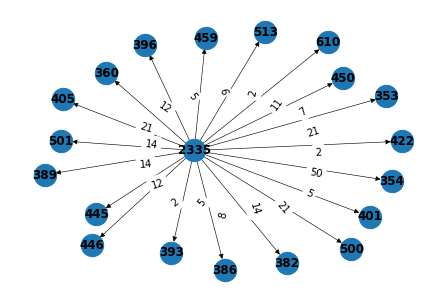

In [118]:
#dibuja el grafo 2
pos=net.spring_layout(G[1])
net.draw(G[1],node_size=500, width=0.6,with_labels=True,font_weight='bold')
labels=net.get_edge_attributes(G[1],'weight')
net.draw_networkx_edge_labels(G[1],pos,edge_labels=labels)

{('2352', '353'): Text(0.48047240846264266, -0.26755565339271736, '8'),
 ('2352', '354'): Text(0.07089662966955917, 0.40489762019583897, '4'),
 ('2352', '360'): Text(-0.17385041835790216, -0.49578378675637075, '27'),
 ('2352', '382'): Text(-0.3191982126081811, -0.24452622977511687, '9'),
 ('2352', '386'): Text(0.35478154795920497, 0.28252606344310494, '15'),
 ('2352', '389'): Text(0.4891035839844566, 0.22477983346601382, '8'),
 ('2352', '393'): Text(-0.31870927654863473, 0.05145272193319464, '11'),
 ('2352', '396'): Text(0.006197470864574298, -0.5748768665388935, '4'),
 ('2352', '401'): Text(-0.235260436481235, 0.2965164203706138, '4'),
 ('2352', '405'): Text(0.2405230361272528, 0.3847845554707124, '9'),
 ('2352', '422'): Text(-0.3269177546853364, -0.3824544154855373, '1'),
 ('2352', '445'): Text(0.5389622823606778, 0.0514182423857559, '28'),
 ('2352', '446'): Text(-0.3650228026492419, 0.18724856120094824, '2'),
 ('2352', '450'): Text(-0.08432111859713144, 0.35936016492778017, '3'),
 (

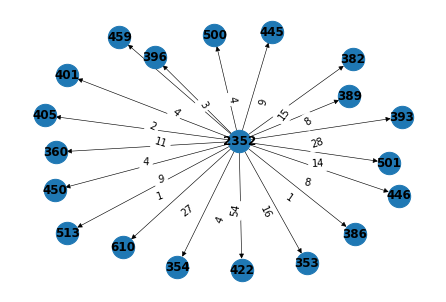

In [119]:
#dibuja el grafo 3
pos=net.spring_layout(G[2])
net.draw(G[2],node_size=500, width=0.6,with_labels=True,font_weight='bold')
labels=net.get_edge_attributes(G[2],'weight')
net.draw_networkx_edge_labels(G[2],pos,edge_labels=labels)

{('2584', '353'): Text(0.008164150256174854, -0.42613672931136504, '10'),
 ('2584', '354'): Text(0.35789332967387527, 0.3190946410417689, '5'),
 ('2584', '360'): Text(0.23548341167883996, 0.43602087438312676, '31'),
 ('2584', '382'): Text(-0.4934370101723198, -0.12326096819957078, '10'),
 ('2584', '386'): Text(-0.18645542019616765, 0.45771854218518215, '16'),
 ('2584', '389'): Text(-0.44666270036225425, -0.3149056636964146, '8'),
 ('2584', '393'): Text(0.31717507553813257, -0.09567405968921588, '14'),
 ('2584', '396'): Text(0.29560939996755375, -0.2625207085761826, '4'),
 ('2584', '401'): Text(-0.45607306126836034, 0.3613615159757825, '5'),
 ('2584', '405'): Text(-0.3031756759180954, -0.31329119265332805, '11'),
 ('2584', '422'): Text(-0.15222947327381747, -0.39027384929442444, '1'),
 ('2584', '445'): Text(-0.5509979887231121, 0.03916390759466695, '29'),
 ('2584', '446'): Text(0.4316278004893698, -0.052807355880128096, '2'),
 ('2584', '450'): Text(-0.08399390430343268, 0.55733921211650

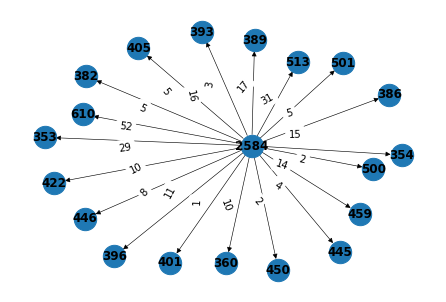

In [120]:
#dibuja el grafo 4
pos=net.spring_layout(G[3])
net.draw(G[3],node_size=500, width=0.6,with_labels=True,font_weight='bold')
labels=net.get_edge_attributes(G[3],'weight')
net.draw_networkx_edge_labels(G[3],pos,edge_labels=labels)